1. (10 points). Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.
2. (30 points). Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?
3. (10 points). Provide descriptive statistical summaries of the data for each gender category.
4. (10 points). What is the 95% confidence interval for the population mean of each gender category, and what is the 95%  confidence interval for the difference between the means of the two populations?
5. (20 points). Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.
6. (20 points). Make a report including the testing of the assumptions for two independent samples t-test.

In [22]:
import pandas as pd
from scipy import stats
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#Hours spent talking on cellphone for males and females at Midwestern University
data = {
    'Males': [12, 4, 11, 13, 11, 11, 7, 9, 10, 7, 9, 10, 7, 12, 6, 9, 15, 11, 10, 8, 11, 7, 10, 10, 9, 7, 9, 12, 8, 13, 10, 9, 10, 8, 11, 10, 9, 12, 13, 9],
    'Females': [9, 7, 10, 9, 7, 10, 7, 10, 7, 9, 8, 9, 12, 14, 12, 8, 12, 12, 10, 9, 10, 11, 7, 9, 11, 9, 11, 8, 13, 10, 9, 11, 9, 8, 9, 12, 9, 12, 11, 11]
}

df = pd.DataFrame(data)
df


,Males,Females
0,12,9
1,4,7
2,11,10
3,13,9
4,11,7
5,11,10
6,7,7
7,9,10
8,10,7
9,7,9


#### 1.Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

#### Hypotheses:

Null hypothesis (H0) = The time spent talking on cellphones by males and females are the same ---> U1=U2


Alternative hypothesis (H1) = The time spent talking on cellphones by males and females are different ---> U1 ≠ U2

#### Assumptions:


The two samples data groups are independent.


The data elements in respective groups follow any normal distribution.


The given two samples have similar variances.


#### Test:
Two sample t-test to compare the means of the two independent samples. The population variance is unknown but assumed equal and this test will assess if there is a significant difference between the two means.

#### Final Result:
If the p value is less than or equal to 0.05, we will reject H0, because it means that there is a significant difference in the two groups or else, reject H1 because it would mean that there is not enough evidence to conclude a difference between the two groups.




#### 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?


In [11]:
males = df['Males']
females = df['Females']

t_stat, p_value = stats.ttest_ind(males, females, equal_var=True)

t_stat, p_value

#The p-value is 0.91, significantly greater than the standard significance level 0.05, so we reject H0. 
#The results indicate no statistically significant difference between the two sample groups.

(-0.11163357309213415, 0.9114007246789633)

#### 3. Provide descriptive statistical summaries of the data for each gender category.

In [12]:
male_stats = males.describe()
female_stats = females.describe()

male_stats, female_stats


(count    40.000000
 mean      9.725000
 std       2.195421
 min       4.000000
 25%       8.750000
 50%      10.000000
 75%      11.000000
 max      15.000000
 Name: Males, dtype: float64,
 count    40.000000
 mean      9.775000
 std       1.790108
 min       7.000000
 25%       9.000000
 50%       9.500000
 75%      11.000000
 max      14.000000
 Name: Females, dtype: float64)

#### 4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95%  confidence interval for the difference between the means of the two populations?

In [15]:
male_mean = males.mean()
female_mean = females.mean()

male_ci = stats.t.interval(0.95, len(males) - 1, loc=male_mean, scale=stats.sem(males))
female_ci = stats.t.interval(0.95, len(females) - 1, loc=female_mean, scale=stats.sem(females))

mean_diff = male_mean - female_mean
pooled_std = np.sqrt(((len(males) - 1) * males.var() + (len(females) - 1) * females.var()) / (len(males) + len(females) - 2))
margin_error = stats.t.ppf(0.975, len(males) + len(females) - 2) * pooled_std * np.sqrt((1 / len(males)) + (1 / len(females)))
ci_diff = (mean_diff - margin_error, mean_diff + margin_error)

print("95% CI for Males:", male_ci)
print("95% CI for Females:", female_ci)
print("95% CI for the difference between means:", ci_diff)

95% CI for Males: (9.02287041856953, 10.427129581430469)
95% CI for Females: (9.2024956423922, 10.3475043576078)
95% CI for the difference between means: (-0.9416883216270353, 0.8416883216270339)


#### 5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.


Yes. A bigger sample size will lead to getting better descriptive statistics like the mean and percentiles because as there are more data to analyze, the closer and closer the computed value will be to its true value, just like the limit of a number in calculus. There is also the decrease in margin of error that leads to a more precise confidence interval. If we are looking for small differences to draw conclusions from the time spent of the males and females, a bigger sample size will help us like the current p value of 0.911. There could be small differences that can potentially be seen if the sample size was bigger. Overall, it would greatly benefit the precision of the tests and computations done. There could even be a possibility of the results from the 20 values per group having a big difference to 100 values per group.

#### 6. Make a report including the testing of the assumptions for two independent samples t-test.


Assumptions:


Independence = Since the data was collected separately for males and females, we assume independence of observations.


Normality = The p values are greater than 0.05, meaning the data is normally distributed.


Equality of variance = The p values again are greater than 0.05, meaning the variances can be considered equal.


Two independent samples t-test:

t-statistic = -0.112, p-value = 0.911

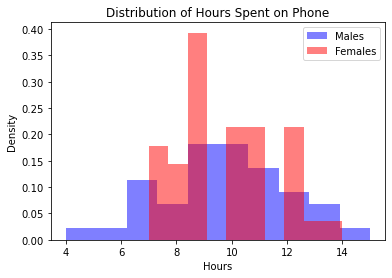

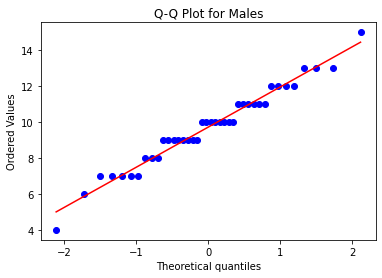

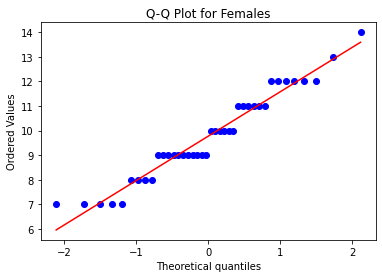

Shapiro-Wilk Test for Males: Statistic = 0.977, p-value = 0.590
Shapiro-Wilk Test for Females: Statistic = 0.948, p-value = 0.064


In [25]:
plt.hist(males, bins=10, alpha=0.5, label='Males', color='blue', density=True)
plt.hist(females, bins=10, alpha=0.5, label='Females', color='red', density=True)
plt.legend(loc='upper right')
plt.title("Distribution of Hours Spent on Phone")
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

stats.probplot(males, dist="norm", plot=plt)
plt.title('Q-Q Plot for Males')
plt.show()

stats.probplot(females, dist="norm", plot=plt)
plt.title('Q-Q Plot for Females')
plt.show()

shapiro_males = stats.shapiro(males)
shapiro_females = stats.shapiro(females)
print(f'Shapiro-Wilk Test for Males: Statistic = {shapiro_males.statistic:.3f}, p-value = {shapiro_males.pvalue:.3f}')
print(f'Shapiro-Wilk Test for Females: Statistic = {shapiro_females.statistic:.3f}, p-value = {shapiro_females.pvalue:.3f}')


In [27]:
levene_stat, levene_p_value = stats.levene(males, females)
print(f'Levene’s Test for Equality of Variances: Stat = {levene_stat:.3f}, p-value = {levene_p_value:.3f}')


Levene’s Test for Equality of Variances: Stat = 0.521, p-value = 0.473


In [28]:
t_stat, p_value = stats.ttest_ind(males, females, equal_var=(levene_p_value > 0.05))
print(f'Two-Sample t-Test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')


Two-Sample t-Test: t-statistic = -0.112, p-value = 0.911
